In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image=cv2.imread('test.jpg')

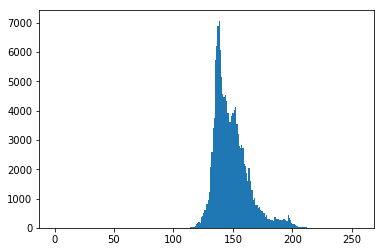

In [3]:
#histogram of original image
plt.hist(image.ravel(),256,[0,256])
plt.show()

In [4]:
#show original image
cv2.imshow('original',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#negative image
negative_img=255-image

In [6]:
cv2.imshow('negative',negative_img)
cv2.waitKey(0)

-1

In [4]:
#histogram equalization
rows,columns,channel=image.shape

In [5]:
blue=image[:,:,0]
green=image[:,:,1]
red=image[:,:,2]

In [6]:
#creating histogram
blue_intensity_count=np.zeros(256)
green_intensity_count=np.zeros(256)
red_intensity_count=np.zeros(256)
for i in range(rows):
    for j in range(columns):
        value_blue=blue[i][j]
        value_green=green[i][j]
        value_red=red[i][j]
        blue_intensity_count[value_blue]=blue_intensity_count[value_blue]+1
        green_intensity_count[value_green]=green_intensity_count[value_green]+1
        red_intensity_count[value_red]=red_intensity_count[value_red]+1
        


In [7]:
#finding probability
for k in range(256):
    blue_intensity_count[k]=blue_intensity_count[k]/(rows*columns)
    green_intensity_count[k]=green_intensity_count[k]/(rows*columns)
    red_intensity_count[k]=red_intensity_count[k]/(rows*columns)

In [8]:
#finding cumulative
blue_cumulative=np.zeros(256)
green_cumulative=np.zeros(256)
red_cumulative=np.zeros(256)
blue_cumulative[0]=blue_intensity_count[0]
green_cumulative[0]=green_intensity_count[0]
red_cumulative[0]=red_intensity_count[0]
for l in range(255):
    blue_cumulative[l+1]=blue_cumulative[l]+blue_intensity_count[l+1]
    green_cumulative[l+1]=green_cumulative[l]+green_intensity_count[l+1]
    red_cumulative[l+1]=red_cumulative[l]+red_intensity_count[l+1]
    

In [9]:
#multiplying with 255
for m in range(256):
    blue_cumulative[m]=round(blue_cumulative[m]*255)
    green_cumulative[m]=round(green_cumulative[m]*255)
    red_cumulative[m]=round(red_cumulative[m]*255)

In [10]:
#mapping
new=image.copy()


In [11]:
blue.shape

(183, 275)

In [12]:
for n in range(rows):
    for o in range(columns):
        v1=blue[n][o]
        v2=green[n][o]
        v3=red[n][o]
        blue[n][o]=blue_cumulative[v1]
        green[n][o]=green_cumulative[v2]
        red[n][o]=red_cumulative[v3]

In [13]:
new[:,:,0]=blue
new[:,:,1]=green
new[:,:,2]=red

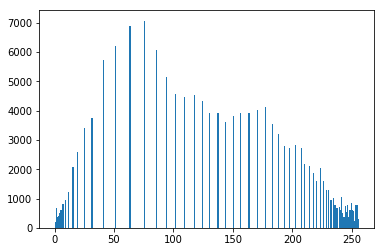

In [14]:
#histogram of equalized image
plt.hist(new.ravel(),256,[0,256])
plt.show()

In [15]:
cv2.imshow('histogram_equalized_image',new)
cv2.waitKey(0)
cv2.destroyAllWindows()